# Task 1 : measurement - Cyrille STROESSER

You need:
* `traceLength.txt`: how many samples per trace (one decimal number)
* `traces.bin`: raw measured traces, one byte per sample (uint8), all traces together continuously

There should be also PT and CT files
* `plaintext.txt`: all PT blocks, (one block per line, in hex, bytes separated by spaces)
* `ciphertext.txt`: all CT blocks, (one block per line, in hex, bytes separated by spaces)

And a screenshot and scope config files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from trace_utils import read_trace_length, load_text, load_traces

In [2]:
# Read trace length
trace_length = read_trace_length("traceLength.txt")
print(f"{trace_length = }")

# Select vertical slice of traces to load
tr_start = 90000
tr_len = 980000 - tr_start

# Load all traces, specified slice of each
traces = load_traces("traces.bin", trace_length, tr_start, tr_len)

# convert trace matrix to floats to prevent potential overflows
traces = traces.astype('float32')

# if you do not need the DC offset, you can remove it by subtracting the mean of each trace
# (but do not subtract it if you need it for average current computation)
# traces = traces - np.mean(traces, axis=1, keepdims=True)

print(f"Loaded traces have shape {traces.shape}") # dimensions of matrix of traces

trace_length = 1062500
Traces file traces.bin assumed shape (500 x 1062500)
Reading all 500 traces, each from 90000, length 890000
Loaded traces have shape (500, 890000)


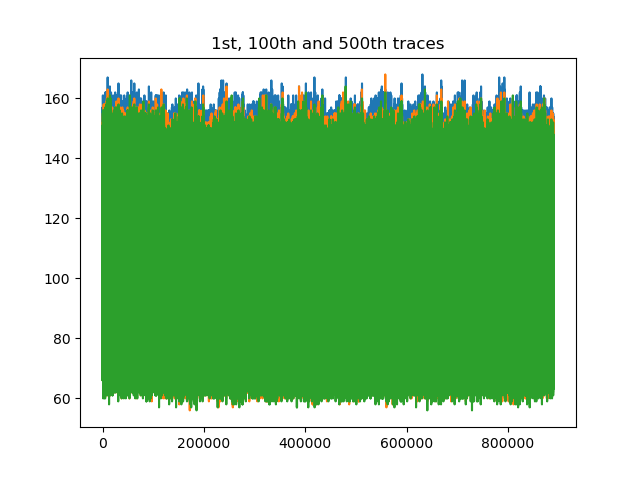

In [3]:
# Display three complete traces: an overlay of the 1st, 100th and 500th in one plot
%matplotlib widget
fig=plt.figure()
plt.title("1st, 100th and 500th traces")
plt.plot(traces[[0,99,499]].T)
plt.show()

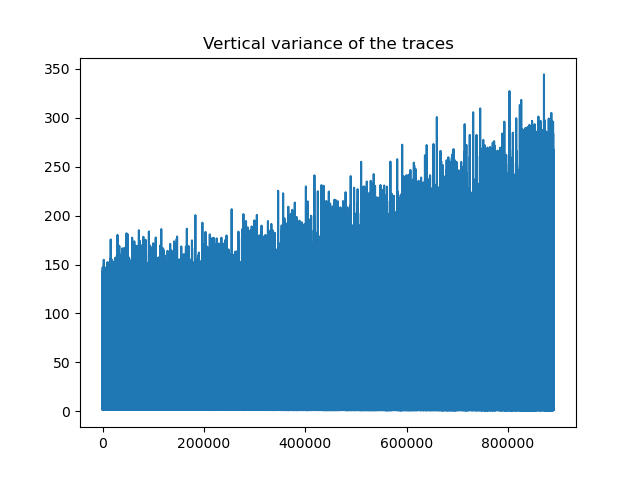

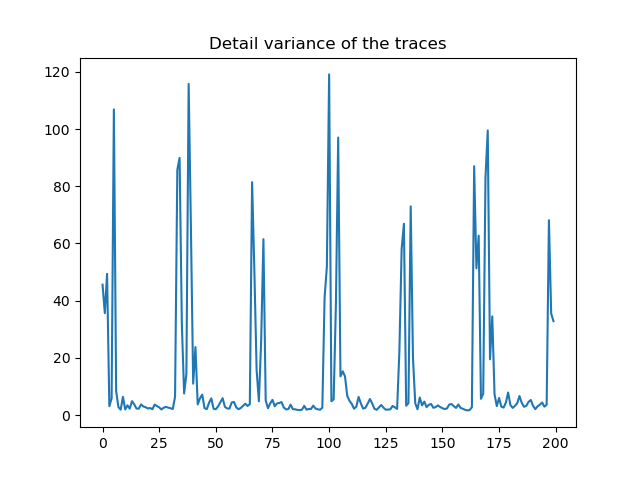

In [6]:
# Vertical variance of the traces
variance_trace  = np.var(traces, axis=0)
variance_trace.shape
fig=plt.figure()
plt.title("Vertical variance of the traces")
plt.plot(variance_trace)
plt.show()
fig=plt.figure()
plt.title("Detail variance of the traces")
plt.plot(variance_trace[0:200])
plt.show()

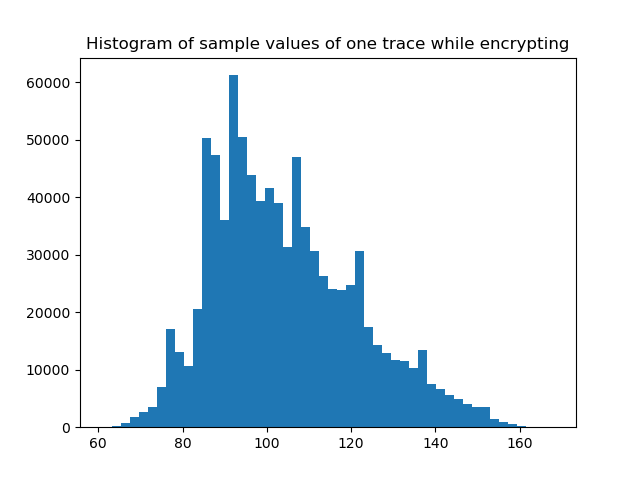

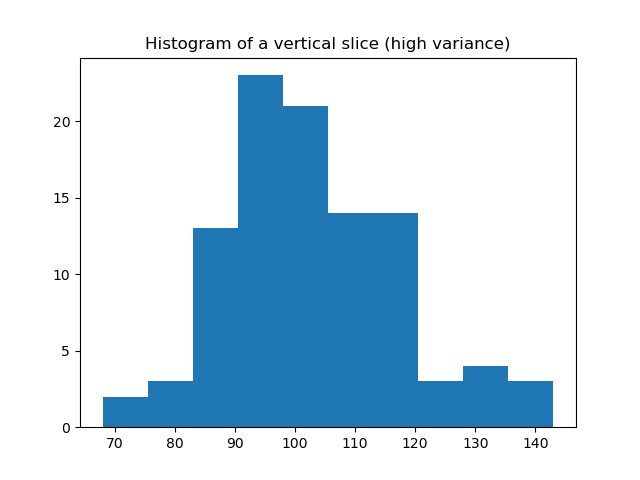

In [9]:
# Display a histogram of sample values of one trace while encrypting
fig=plt.figure()
plt.title("Histogram of sample values of one trace while encrypting")
plt.hist(traces[0], 50)
plt.show()

# Display a histogram of a vertical slice of the trace sample values at a point of high variance of the traces while encrypting
fig=plt.figure()
plt.title("Histogram of a vertical slice (high variance)")
plt.hist(traces[0,800000:800100], 10)
plt.show()

# Display a histogram of a vertical slice of the trace sample values at a point of low variance of the traces while encrypting
# fig=plt.figure()
# plt.title("Histogram of a vertical slice (low variance)")
# plt.hist(traces[:,150,160], 10, (150,160))
# plt.show()

In [ ]:
# Plot a detail of the overlay of all traces (start of encryption)
fig=plt.figure()
plt.plot(traces[:,1000:1100].T)
plt.title("Check alignment - start of encryption")
plt.show()

# Plot a detail of the overlay of all traces (middle of encryption)
fig=plt.figure()
middle = round(len(traces[1])/2)
plt.plot(traces[:,middle:middle+100].T)
plt.title("Check alignment - middle of encryption")
plt.show()

# Plot a detail of the overlay of all traces (end of encryption)
fig=plt.figure()
end = round(len(traces[1]))
plt.plot(traces[:,end-100:end].T)
plt.title("Check alignment - end of encryption")
plt.show()

In [ ]:
# Average current while encrypting
mesured_resistance = 50
voltage = traces[0].mean()
current = voltage/mesured_resistance
print(f"Average current while encrypting:", current, "mA")
